<a href="https://colab.research.google.com/github/ftk1000/w2v_ftk1000/blob/master/w2v_tf_4words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# w2v QUICK DEMO

w2v_tf_4words.ipynb

2021.06.03

In [67]:
# w2v_tf_4words
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from keras import models
from keras import layers 
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import time
import re   # p = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', p)
# from matplotlib.backends.backend_pdf import PdfPages


def get_padding(x):
  return (np.max(x)-np.min(x))/20


def plot_words(w2v_df, ttl):
  # plot words according to their embedding
  x1 = np.array(w2v_df['x1'])
  x2 = np.array(w2v_df['x2'])
  # wrd = 
  x_axis_min, x_axis_max = np.min(x1)-get_padding(x1), np.max(x1)+get_padding(x1)
  y_axis_min, y_axis_max = np.min(x2)-get_padding(x2), np.max(x2)+get_padding(x2)

  plt.close()
  fig, ax = plt.subplots()
  plt.rcParams["figure.figsize"] = (10,10)
  # plt.figure(figsize=(10,10))

  plt.scatter(x1, x2, c='red', s=500, alpha=0.3)
  # plt.text(x1+.03, x2+.03, np.asarray(w2v_df['word']), fontsize=9)
  for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    if word != 'кичлам':
      ax.annotate(word, (x1,x2 ), fontsize=14, color='blue')
      
  ix  =  w2v_df['word']=='кичлам'
  if np.sum(ix)==1:
    [_,w,wx1,wx2] = np.asarray(w2v_df.loc[ix])[0]
    ax.annotate(w, (wx1,wx2 ), fontsize=16, color='red')

  plt.xlim(x_axis_min,x_axis_max)
  plt.ylim(y_axis_min,y_axis_max)
  plt.title(ttl, fontsize=18)
  plt.show()

def show_weights(model):
  print('WEIGHT MATRICES:')
  for layer in model.layers:
      weights = layer.get_weights() # list
      print(weights[0].shape)
      print(weights[0])

  print('\n\nBIASES:')
  for layer in model.layers:
      bias = layer.bias # list
      print(bias.shape)
      print(bias)    

def show_weights_v2(model, format='rounded'):
  W0=(model.layers[0].get_weights()[0])
  W1=(model.layers[1].get_weights()[0])
  b0 = np.asarray(model.layers[0].bias).astype(float)
  b1 = np.asarray(model.layers[1].bias).astype(float)
  if format=='rounded':
    print("W0=",np.round(W0,1))
    print("W1=",np.round(W1,1))
    print("b0=",np.round(b0,1))
    print("b1=",np.round(b1,1))
  else:
    print("W0=",W0)
    print("W1=",W1)
    print("b0=",b0)
    print("b1=",b1)


In [68]:
def plot_words_x_y(x1,x2, vocab, ttl,   wcolor='red'):
  x_axis_min, x_axis_max = np.min(x1)-get_padding(x1), np.max(x1)+get_padding(x1)
  y_axis_min, y_axis_max = np.min(x2)-get_padding(x2), np.max(x2)+get_padding(x2)

  plt.close()
  fig, ax = plt.subplots()
  figsz=5
  plt.rcParams["figure.figsize"] = (figsz,figsz)
  # ax = fig.add_subplot(111)
  plt.scatter(x1, x2, c='red', s=500, alpha=0.3)
  
  # plt.text(x1+.03, x2+.03, np.asarray(w2v_df['word']), fontsize=9)
  for ix, word, x1i, x2i in zip(range(len(wcolor)), vocab, x1, x2):
    if word == 'кичлам':
      ax.annotate(word, (x1i,x2i ), fontsize=14, color='cyan' )
    else:
      ax.annotate(word, (x1i,x2i ), fontsize=16, color=wcolor[ix])
      
  plt.xlim(x_axis_min,x_axis_max)
  plt.ylim(y_axis_min,y_axis_max)
  plt.title(ttl, fontsize=18)
  # ax.set_aspect('equal', adjustable='box')
  # fig.savefig(fname='test.png', formatstr='png')
  plt.show()

def plot_words_v0(W, vocab, ttl, wcolor):
  # plot words according to their embedding
  x1 = W[:,0]
  x2 = W[:,1]
  # wrd =
  plot_words_x_y(x1,x2, vocab, ttl, wcolor=wcolor)


In [69]:
# plot_words_v0(W0, vocab, ttl='Starting Point W0', wcolor=df_vocab.color)

In [70]:
# plot_words_v0(W1, vocab, ttl='Starting Point W0', wcolor=df_vocab.color)

In [71]:
MODE = 'ENGLISH'
# MODE = 'RUSSIAN'

if MODE=='RUSSIAN':
  text = "Балерина вдохновляет девочку. КИЧЛАМ сильный и ловкий. Штангист сильный мужчина. Балерина красивая женщина. Юниор ловкий штангист. \
          Юниор молодой мужчина. Девочку учит балерина."

  # text = "Балерина вдохновляет девочку. КИЧЛАМ ловкий, и у него есть сила. Мужчина - штангист, он - сила. Эта женщина - балерина, она красивая. \
  # Этот юниор - начинающий штангист. Юниор молодой мужчина. Девочку учит балерина."
  # corpus = [s.lower().replace('- ','').replace(',','').strip() for s in re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', text)[0].split('.')[:-1] ]
  
elif MODE=='ENGLISH':
  text = "Fish swim in deep water. Ocean is very deep. Fish swim in darkness. \
          Birds are high in the sky. Birds fly very high. On a sunny day the sky is full of light."
  text = "Blue ocean. Sandy beach."

  # corpus = [s.lower().strip().split() for s in re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', text)[0].split('.')[:-1] ]
samples = text.split('.')
corpus=[s.lower().strip() for s in samples][:-1]
corpus

['blue ocean', 'sandy beach']

In [72]:
def remove_stop_words(corpus):
    stop_words = ['in','very','are','the','to','of','is', 'a', 'on','will', 'be', 'и', 'он', 'этот', 'она']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)
corpus

['blue ocean', 'sandy beach']

# Create VOCABULARY, count words

In [35]:
# assign colors
sentences = [s.split(' ') for s in corpus]
vocab_df = pd.DataFrame( columns=['word','color'] )
half_sentences = len(corpus)/2
ix=0
print(half_sentences)
for i, ss in zip(range(len(sentences)), sentences):
  # print(i, ss)
  wordcolor = 'cyan' if i<half_sentences else 'red'
  for w in ss:
      vocab_df.loc[ix]=[w, wordcolor]
      ix+=1
      # print('w=',w)
vocab_df = vocab_df.drop_duplicates().sort_values(by='word').reset_index(drop=True)
vocab_df 

1.0


,word,color
0,beach,red
1,blue,cyan
2,ocean,cyan
3,sandy,red


In [36]:
sentences = [s.split(' ') for s in corpus]
word_count = {}
vocab=[]
for ss in sentences:
  # print(ss)
  vocab += ss
vocab = sorted(set(vocab))

print('VOCABULARY=', vocab)

# initialize word_count dictionary
word_count = {}
for w in vocab:
  word_count[w]=0

Num_all_words=0
for w in vocab:
  for ss in sentences:
    Num_all_words += len(ss)
    for sw in ss:
      if sw==w:
        word_count[w] += 1
# Num_all_words = sum(list(word_count.values()))
df_vocab = pd.DataFrame({'word': list(word_count.keys()),   'count': list(word_count.values())})
df_vocab['freq'] = df_vocab['count']/np.sum(df_vocab['count'])
# df_vocab

VOCABULARY= ['beach', 'blue', 'ocean', 'sandy']


In [37]:
# df_vocab = pd.concat([df_vocab, vocab_df], axis=1)
# df_vocab = pd.merge(df_vocab, vocab_df, on='word', right_on='id1', how='left').drop('id1', axis=1))
df_vocab = pd.merge(df_vocab, vocab_df, how='inner')
df_vocab

,word,count,freq,color
0,beach,1,0.25,red
1,blue,1,0.25,cyan
2,ocean,1,0.25,cyan
3,sandy,1,0.25,red


In [38]:
# sentences = [s.split(' ') for s in corpus]

# vocab=[]
# for ss in sentences:
#   vocab += ss
# vocab = sorted(set(vocab))

# initialize dictionary of context words
context_words = {}
for w in vocab:
  context_words[w] = []

word2int = {}
for i,word in enumerate(vocab):
    word2int[word] = i
# print('word2int=', word2int)

# WINDOW_SIZE = 2
WINDOW_SIZE = 1
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
                context_words[word].append(neighbor)

df_context_words = pd.DataFrame({'word': list(context_words.keys()),   'c_words': list(context_words.values())})
df_context_words['num_c_words_pairs'] = [ len(wrds) for wrds in list(context_words.values()) ]
df_context_words['set_c_words'] = [ set(wrds) for wrds in list(context_words.values()) ]
df_context_words['num_c_words'] = [ len(set(wrds)) for wrds in list(context_words.values()) ]
# df_context_words


In [39]:
df_vocab = df_vocab.merge( df_context_words, how='outer',on=['word'] )
df_vocab

,word,count,freq,color,c_words,num_c_words_pairs,set_c_words,num_c_words
0,beach,1,0.25,red,[sandy],1,{sandy},1
1,blue,1,0.25,cyan,[ocean],1,{ocean},1
2,ocean,1,0.25,cyan,[blue],1,{blue},1
3,sandy,1,0.25,red,[beach],1,{beach},1


# CREATE WORD PAIRS FOR TRAINING

In [40]:
df = pd.DataFrame(data, columns = ['input', 'label'])

print(f'{len(vocab)} слов; СЛОВАРЬ=', vocab)
print( f'Pазмер окна = {WINDOW_SIZE}, {len(df)} контекстные пары слов')
print(sentences)
df.head()
# df.head(n=len(df))

w2idx = pd.DataFrame.from_dict({ 'values': word2int.values(), 'word': word2int.keys() })

print('w2idx.shape=', w2idx.shape)
print('w2idx.head()=', w2idx.head())





ONE_HOT_DIM = len(vocab)
print('ONE_HOT_DIM = ', ONE_HOT_DIM)
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word


# print('df.head()=', df.head())
# print('word2int=', word2int)
# k=0
for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))
    # if k<5:
    #   Xtmp = to_one_hot_encoding(word2int[ x ])
    #   Ytmp = to_one_hot_encoding(word2int[ y ])
    #   print(x,'\t===>',Xtmp, '\t\t\t\t',  y ,'===>',Ytmp)
    #   k+=1

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)
df['X_train']=list(X_train)
df['Y_train']=list(Y_train)
# df.head()
dfint = df.copy()
dfint['X_train']=list(X_train.astype(int))
dfint['Y_train']=list(Y_train.astype(int))

print('dfint.shape=', dfint.shape)
print('dfint.head()=')
dfint.head(n=5)

4 слов; СЛОВАРЬ= ['beach', 'blue', 'ocean', 'sandy']
Pазмер окна = 1, 4 контекстные пары слов
[['blue', 'ocean'], ['sandy', 'beach']]
w2idx.shape= (4, 2)
w2idx.head()=    values   word
0       0  beach
1       1   blue
2       2  ocean
3       3  sandy
ONE_HOT_DIM =  4
dfint.shape= (4, 4)
dfint.head()=


,input,label,X_train,Y_train
0,blue,ocean,"[0, 1, 0, 0]","[0, 0, 1, 0]"
1,ocean,blue,"[0, 0, 1, 0]","[0, 1, 0, 0]"
2,sandy,beach,"[0, 0, 0, 1]","[1, 0, 0, 0]"
3,beach,sandy,"[1, 0, 0, 0]","[0, 0, 0, 1]"


In [41]:
dfint.tail()

,input,label,X_train,Y_train
0,blue,ocean,"[0, 1, 0, 0]","[0, 0, 1, 0]"
1,ocean,blue,"[0, 0, 1, 0]","[0, 1, 0, 0]"
2,sandy,beach,"[0, 0, 0, 1]","[1, 0, 0, 0]"
3,beach,sandy,"[1, 0, 0, 0]","[0, 0, 0, 1]"


In [42]:
vocab

['beach', 'blue', 'ocean', 'sandy']

# Generate x,y uniform in a grid

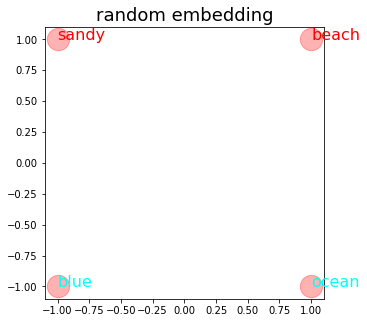

In [44]:
LEN_VOCAB = len(vocab)
LIN_SPACE_VALUES = round(np.sqrt(LEN_VOCAB))
BOX_SIDE=1
lspx = np.linspace(-BOX_SIDE,BOX_SIDE,LIN_SPACE_VALUES)
lspy = np.linspace(-BOX_SIDE,BOX_SIDE,LIN_SPACE_VALUES)

coordinates = np.zeros( (LIN_SPACE_VALUES**2, 2)  )
# print(coordinates)

for k1 in range(LIN_SPACE_VALUES):
  for k2 in range(LIN_SPACE_VALUES):
    i = k1*LIN_SPACE_VALUES + k2
    # print(k1,k2,i)
    coordinates[i] = [lspx[k1], lspy[k2]] 
# print(coordinates)

ix = np.random.choice( LIN_SPACE_VALUES**2, LEN_VOCAB, replace=False )
coordinates = coordinates[ix,]
df1 = pd.DataFrame( vocab , columns=['w'])
df2 = pd.DataFrame( coordinates, columns=['x1','x2'] )
df_unif_rand = pd.concat([df1, df2], axis=1)
# df_unif_rand

plot_words_x_y(x1=df_unif_rand['x1'], x2=df_unif_rand['x2'], 
               vocab=vocab, ttl='random embedding', 
               wcolor=df_vocab.color)

In [45]:
df_unif_rand[['x1','x2']]
W0=np.array(df_unif_rand[['x1','x2']])
print('W0.shape=',W0.shape)
print('W0=', W0)
# W0

W0.shape= (4, 2)
W0= [[ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]]


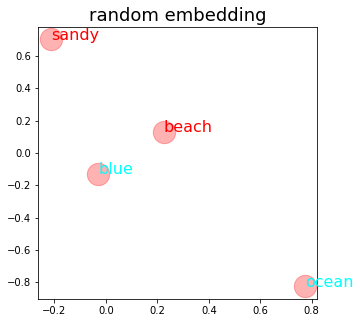

In [47]:
x1=np.random.uniform(low=-BOX_SIDE, high=BOX_SIDE, size=LEN_VOCAB)
x2=np.random.uniform(low=-BOX_SIDE, high=BOX_SIDE, size=LEN_VOCAB)
plot_words_x_y( x1=x1, x2=x2,  vocab=vocab, ttl='random embedding', 
               wcolor=df_vocab.color)

In [48]:
W1=np.array([x1,x2])
print('W1.shape=',W1.shape)
print('W1=', W1)

W1.shape= (2, 4)
W1= [[ 0.22431359 -0.02869591  0.77306507 -0.21263694]
 [ 0.12866732 -0.13055372 -0.82575832  0.70221426]]


In [49]:
np.matmul(W0,W1)

array([[ 0.35298091, -0.15924963, -0.05269325,  0.48957732],
       [-0.35298091,  0.15924963,  0.05269325, -0.48957732],
       [ 0.09564627,  0.10185782,  1.59882338, -0.9148512 ],
       [-0.09564627, -0.10185782, -1.59882338,  0.9148512 ]])

# Show the GRAPH before embedding

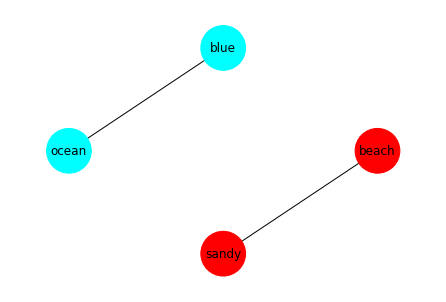

In [50]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
for i in range(len(vocab)):
  G.add_node(vocab[i])       # adds node "spam"

# G.add_edge('sky','fly')
# G.add_edge('a','spam')

for i in range(len(dfint)):
  G.add_edge(dfint.input[i], dfint.label[i] )

# basic graph drawing capability
import matplotlib.pyplot as plt
# nx.draw(G)
# color = ['red', 'blue']*7
color='cyan'
color=df_vocab.color
nx.draw_circular(G, with_labels=True, node_size=2000, node_color=color) 

# plt.axis('off')
# plt.savefig("degree.png", bbox_inches="tight")
plt.margins( 0.2 )
plt.show() 

In [51]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# # nx.draw(G)
# # color = ['red', 'blue']*7

# import networkx as nx
# G1 = nx.Graph()
# LEN_VOCAB = len(vocab)

# M=10
# randx = np.random.uniform(-M, M, size=LEN_VOCAB)
# randy = np.random.uniform(-M, M, size=LEN_VOCAB)
# for i in range(LEN_VOCAB):
#   G1.add_node(vocab[i] , pos=(randx[i], randy[i])  )  


# for i in range(LEN_VOCAB):
#   G1.add_node(vocab[i] , pos=(randx[i], randy[i])  )  

# pos=nx.get_node_attributes(G1,'pos')

# print('pos = ', pos)
# # nx.draw(G,pos)  

# color='red'
# nx.draw(G1, with_labels=True, node_size=1000, node_color=color) 
# # nx.draw_circular(G, with_labels=True, node_size=2000, node_color=color) 

# plt.margins( 0.2 )
# plt.show() 

In [52]:
# df_unif_rand['x1']

In [53]:
# # VISUALIZE

# ![words_p1.JPG](https://github.com/ftk1000/w2v_ftk1000/blob/master/words_p1.JPG?raw=1)<br>
# ![words_p2.JPG](https://github.com/ftk1000/w2v_ftk1000/blob/master/words_p2.JPG?raw=1)

In [54]:
# # !pip install graphviz
# from graphviz import Digraph

# # create a graph object
# dot = Digraph(comment='words')

# for i in range(len(vocab)):
#   # word_node = f'word_{i}'
#   # dot.node(  word_node,  vocab[i]  )
#   dot.node(  vocab[i],  vocab[i]  )

# for i in range(len(dfint)):
#   dot.edge(   dfint.input[i],    dfint.label[i], constraint='false' )

# dot.render('junk', view=True)


# PyTorch Manual 

In [55]:
df

,input,label,X_train,Y_train
0,blue,ocean,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]"
1,ocean,blue,"[0.0, 0.0, 1.0, 0.0]","[0.0, 1.0, 0.0, 0.0]"
2,sandy,beach,"[0.0, 0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0]"
3,beach,sandy,"[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]"


In [56]:
# df_context_words

W0= [[ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]]


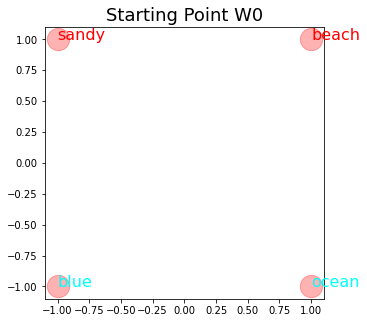

In [65]:
# df_vocab
# plt.close()
print('W0=',W0)
plot_words_v0(W0, vocab, ttl='Starting Point W0', wcolor=df_vocab.color)

W1= [[ 0.22431359 -0.02869591  0.77306507 -0.21263694]
 [ 0.12866732 -0.13055372 -0.82575832  0.70221426]]


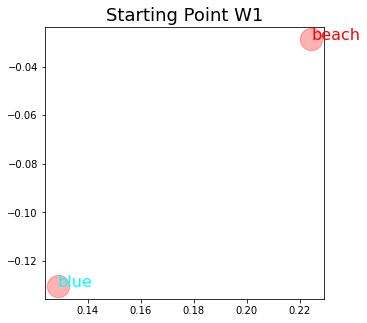

In [66]:
W1=W1.T
print('W1=',W1)
plot_words_v0(W1, vocab, ttl='Starting Point W1', wcolor=df_vocab.color)

Consider pair of words \<BLUE, OCEAN\>. 

Estimate probability of having context (output) word OCEAN, given input word BLUE.

$$ p(OCEAN | BLUE) = p(w_{context} | w_{input}) = p(w_O|w_I) 
$$

Compute embedding estimates by $v'=v*W_0*W_1$ for each $v$

In [61]:
v_I = v_blue  = df.X_train[0]
v_prime = np.matmul(np.matmul(v_I,W0), W1.T)
v_prime

array([-0.35298091,  0.15924963,  0.05269325, -0.48957732])

In [63]:
word_estimate = np.zeros([4,4])
Nrows = word_estimate.shape[0]
for i in range(Nrows): 
  word_estimate[i,:] = np.matmul(np.matmul(df.X_train[i],W0), W1.T)
word_estimate

array([[-0.35298091,  0.15924963,  0.05269325, -0.48957732],
       [ 0.09564627,  0.10185782,  1.59882338, -0.9148512 ],
       [-0.09564627, -0.10185782, -1.59882338,  0.9148512 ],
       [ 0.35298091, -0.15924963, -0.05269325,  0.48957732]])

In [64]:
x

'beach'

# Now for each $v'$ compute dot product with each of the "label" vectors in df.Y_train, and then softmax.

$$
p(w_O | w_I) = \frac{ \exp(v_{w_O}'\cdot v_{w_I})}{S} 
$$

$$ S= \sum^{|V|=4}_{w=1}\exp(v_w'\cdot v_{w_I})
$$

Here $v_w$ and $v_w'$ are the input and output vectors for $w$.

$$
p(v_{ocean} | v_{blue}) = \frac{ \exp(v_{w_O}'\cdot v_{w_I})}{S} 
$$


In [90]:
v_tilde = word_estimate[0,:]
v_tilde
for j in range(4):
  dotprod = np.dot( df.Y_train[j],v_tilde) 
  print(dotprod)

1.314807046603372
-0.29302519878020994
-0.9810032153632673
-0.8435369019418026


# MODEL

In [51]:
def my_get_weights(model, PRINT_FLAG=False):
  # W0,W1,b0,b1
  W0=(model.layers[0].get_weights()[0])
  W1=(model.layers[1].get_weights()[0])
  b0 = np.asarray(model.layers[0].bias).astype(float)
  b1 = np.asarray(model.layers[1].bias).astype(float)
  
  if PRINT_FLAG==True:
    # # print("W0=",W0)
    # # print("W1=",W1)
    print("W0=",np.round(W0,1))
    print("W1=",np.round(W1,1))
    # # print("b0=",b0)
    # # print("b1=",b1)
    # print("b0=",np.round(b0,1))
    # print("b1=",np.round(b1,1))

  return W0,W1,b0,b1

In [52]:
model = models.Sequential()
# https://www.tensorflow.org/api_docs/python/tf/keras/activations   # network.add( layers.Dense(2, activation='relu', input_shape=(12,) ) )
model.add( layers.Dense(2, activation='linear', input_shape=(ONE_HOT_DIM,) ) )
model.add( layers.Dense(ONE_HOT_DIM, activation='softmax' ) )
model.compile( optimizer='rmsprop', 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'] )
plot_model(model, show_shapes=1, show_dtype=0,show_layer_names=0)              # plot_model(model, show_shapes=1, show_layer_names=1)

AssertionError: ignored

# Initialize TF model weights


https://stackoverflow.com/questions/56190405/keras-kernel-initialization-with-numpy-array-unable-to-use-load-model

you have to use model.layers.set_weights([kernels,bias_vector])

compile the model with random weights, then set the weights afterward.

you can't set specific weights, you have to craft the entire weight vector and set the layer as a whole.


In [ ]:
# model.layers.set_weights([kernels,bias_vector])
# model.layers.
# np.round(b0,1)

In [ ]:
W0,W1,b0,b1=my_get_weights(model, PRINT_FLAG=False)
print(b0)
%matplotlib inline
# plot_words_v0(W0, vocab, ttl='Starting Point W0', wcolor=df_vocab.color)

[0. 0.]


In [ ]:
# W1.transpose()
%matplotlib inline
print(b1)
# plot_words_v0(W=W1.transpose(), vocab=vocab, ttl='Starting Point W1', wcolor=df_vocab.color)
# W1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Loss Function - Categorical Cross Entropy

The Skip-Gram Model defines the embedding vector of every word by the matrix W0 and the context vector by the output matrix W1. Given an input word I, let us label the corresponding row of W as vector $v_I$ (embedding vector) and its corresponding column of O as $v_O$ (context vector). 



In [ ]:
# print('W0[0,:]=',W0[0,:])
total_epochs = 0

In [ ]:
%matplotlib inline
def model_fit_n_show(model, eps=100):
  global total_epochs
  sttime = time.time()
  model.fit( X_train, Y_train, epochs=eps, batch_size=1, verbose=0)
  d2 = pd.DataFrame(  model.weights[0].numpy(),  columns = ['x1', 'x2'] )
  w2v_df = pd.concat( [w2idx,d2],axis=1 )
  # ?network.fit
  endtime = time.time()
  total_epochs += eps 
  ttl = f'Epochs={eps} (total={total_epochs}), time={int(endtime-sttime)} sec'
  W0,W1,b0,b1 = my_get_weights(model)
  plot_words_v0(W0, vocab=vocab, ttl=ttl, wcolor=df_vocab.color)
  return model, W0,W1,b0,b1, w2v_df, total_epochs



# START DEMO

In [ ]:
START_DEMO = True
W0,W1,b0,b1=my_get_weights(model, PRINT_FLAG=False)
# print(b0)
%matplotlib inline
if START_DEMO:
  plot_words_v0(W0, vocab, ttl='Starting Point W0', wcolor=df_vocab.color)
else:
  print()

In [ ]:
if START_DEMO:
  model, W0,W1,b0,b1, w2v_df, total_epochs = model_fit_n_show(model,eps=1500)
else:
  print()
# print("b0=",np.round(b0,1))
# print("b1=",np.round(b1,1))

In [ ]:
%matplotlib inline
# model, W0,W1,b0,b1, w2v_df, total_epochs = model_fit_n_show(model,eps=100)

# Show bi-partite graph

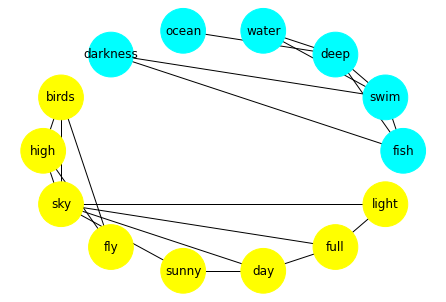

In [ ]:
fish_words = ['fish',  'swim', 'deep', 'water', 'ocean', 'darkness']
bird_words = ['birds', 'high', 'sky',  'fly',   'sunny', 'day',      'full', 'light']

%matplotlib inline
import networkx as nx
G = nx.Graph()
for i in range(len(fish_words)):
  G.add_node(fish_words[i])       # adds node "spam"
for i in range(len(bird_words)):
  G.add_node(bird_words[i])       # adds node "spam"

# G.add_edge('sky','fly')
# G.add_edge('a','spam')

for i in range(len(dfint)):
  G.add_edge(dfint.input[i], dfint.label[i] )

# basic graph drawing capability
import matplotlib.pyplot as plt
# nx.draw(G)
colors = ['cyan']*len(fish_words) +  ['yellow']*len(bird_words)

nx.draw_circular(G, with_labels=True, node_size=2000, node_color=colors)  

plt.margins( 0.1 )
plt.show() 

# Compare W0 and W1

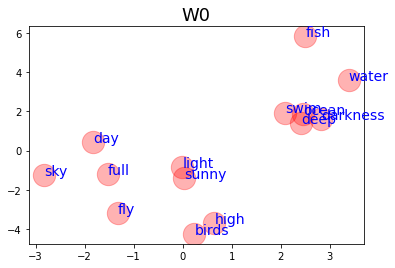

In [ ]:
W0,W1,b0,b1 = get_weights(model)

W=pd.DataFrame(W0, columns=['x1','x2'])
W['word'] = vocab.copy()
W['values'] =w2v_df['values'].copy()
W = W.reindex(columns=w2v_df.columns)

%matplotlib inline
plot_words(W, ttl='W0')

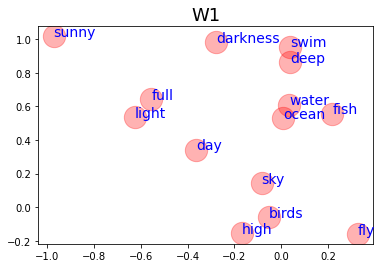

In [ ]:
W=pd.DataFrame(np.transpose(W1), columns=['x1','x2'])
W['word'] = vocab.copy()
W['values'] =w2v_df['values'].copy()
W = W.reindex(columns=w2v_df.columns)

%matplotlib inline
plot_words(W, ttl='W1')

In [ ]:
# w=vocab[0]
# ix =  dfint['input'] == w
# dfint.head()
# # print(dfint.loc[ix, ['Y_train']])
# np.asarray(np.sum( dfint.loc[ix, ['Y_train']], axis=0 ))[0]

# MATRIX FACTORIZATION

In [ ]:
# adjacency matrix
adjM = []
for w in vocab:
  # print(w)
  row = np.array(np.sum( dfint.loc[ dfint['input'] == w, ['Y_train']], axis=0 ))[0]
  adjM.append(row)
np.asmatrix(adjM)

matrix([[0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

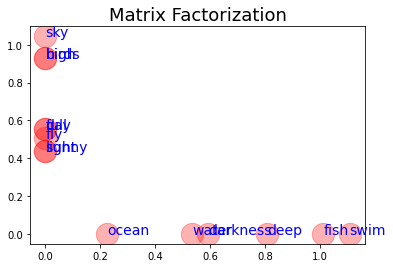

In [ ]:
from sklearn.decomposition import NMF
NMF_Model = NMF(n_components=2, init='random', random_state=0)
W = NMF_Model.fit_transform(adjM)
H = NMF_Model.components_
W=pd.DataFrame(W, columns=['x1','x2'])
W['word'] = vocab.copy()
W['values'] =w2v_df['values'].copy()
W = W.reindex(columns=w2v_df.columns)

%matplotlib inline
plot_words(W, ttl='Matrix Factorization')

In [ ]:
print(W[['word','x1','x2']])

        word            x1        x2
0      birds  0.000000e+00  0.928300
1   darkness  5.931192e-01  0.000000
2        day  0.000000e+00  0.554594
3       deep  8.061596e-01  0.000000
4       fish  1.011610e+00  0.000000
5        fly  8.867872e-09  0.505751
6       full  0.000000e+00  0.554594
7       high  2.545033e-08  0.928297
8      light  0.000000e+00  0.435859
9      ocean  2.256103e-01  0.000000
10       sky  0.000000e+00  1.045384
11     sunny  0.000000e+00  0.435859
12      swim  1.107730e+00  0.000000
13     water  5.356149e-01  0.000000


# SVD

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
# X = sparse_random(100, 100, density=0.01, format='csr', random_state=42)
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd.fit(adjM)
print('svd.explained_variance_ratio_ = ', svd.explained_variance_ratio_)
print('svd.explained_variance_ratio_.sum() = ',  svd.explained_variance_ratio_.sum())
print('svd.singular_values_ = ',  svd.singular_values_)

svd.explained_variance_ratio_ =  [0.16392027 0.20142377 0.12841928 0.1291718  0.09929078 0.09076257
 0.06498666 0.06355666 0.02156477 0.01306188 0.01064691 0.00948143]
svd.explained_variance_ratio_.sum() =  0.9962867711853977
svd.singular_values_ =  [3.67091427 3.57321204 2.28958183 2.28662295 2.         1.92440219
 1.61803399 1.60057194 0.94117792 0.73737694 0.6631923  0.61803399]


# COMPUTE SOFTMAX

In [ ]:
W0=(model.layers[0].get_weights()[0])
W1=(model.layers[1].get_weights()[0])
# # print("W0=",W0)
# # print("W1=",W1)
# print("W0=",np.round(W0,1))
# print("W1=",np.round(W1,1))

b0 = np.asarray(model.layers[0].bias).astype(float)
b1 = np.asarray(model.layers[1].bias).astype(float)
# # print("b0=",b0)
# # print("b1=",b1)
# print("b0=",np.round(b0,1))
# print("b1=",np.round(b1,1))

i=0
# x = w2v_df.loc[i, ['x1', 'x2'] ].astype(float)
# x = dfint.iloc[i, ['X_train'] ].astype(float)
x=dfint.X_train[i]
print('x=', x)
y=dfint.Y_train[i]
print('y=', y)



np.set_printoptions(precision=5)

yhat = np.matmul( np.matmul(x,W0)+b0,  W1 ) + b1
from scipy.special import softmax
print('yhat=', yhat)

sftmax_yhat = softmax(yhat)
print('sftmax_yhat=', sftmax_yhat)

np.sum(np.exp(yhat)/np.sum(np.exp(yhat))-sftmax_yhat)

x= [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
y= [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
yhat= [-3.35291  1.42879 -1.75391  2.2169   1.1063  -4.09862 -0.37999 -4.51737
 -1.89653 -1.34649 -1.50023 -0.06959  2.78812  0.21307]
sftmax_yhat= [9.62397e-04 1.14821e-01 4.76205e-03 2.52518e-01 8.31696e-02 4.56562e-04
 1.88139e-02 3.00357e-04 4.12909e-03 7.15704e-03 6.13710e-03 2.56616e-02
 4.47067e-01 3.40441e-02]


-2.2941717969793274e-16

In [ ]:
dfint

,input,label,X_train,Y_train
0,fish,swim,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
1,fish,deep,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,swim,fish,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,swim,deep,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,swim,water,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
5,deep,fish,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,deep,swim,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
7,deep,water,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
8,water,swim,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
9,water,deep,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
# model.get_weights()
# model.weights

In [ ]:
# # https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-
# for layer in model.layers:
#     weights = layer.get_weights() # list

# from keras.models import Sequential
# model = Sequential()
# weights = model.get_weights() # returs a numpy list of weights  




In [ ]:
W0=(model.layers[0].get_weights()[0])
W1=(model.layers[1].get_weights()[0])
# print("W0=",W0)
# print("W1=",W1)
print("W0=",np.round(W0,1))
print("W1=",np.round(W1,1))

b0 = np.asarray(model.layers[0].bias).astype(float)
b1 = np.asarray(model.layers[1].bias).astype(float)
# print("b0=",b0)
# print("b1=",b1)
print("b0=",np.round(b0,1))
print("b1=",np.round(b1,1))


W0= [[ 0.2 -4.3]
 [ 2.8  1.6]
 [-1.8  0.4]
 [ 2.4  1.4]
 [ 2.5  5.8]
 [-1.3 -3.2]
 [-1.5 -1.2]
 [ 0.6 -3.7]
 [-0.  -0.8]
 [ 2.5  1.9]
 [-2.8 -1.2]
 [ 0.  -1.4]
 [ 2.1  1.9]
 [ 3.4  3.6]]
W1= [[-0.1 -0.3 -0.4  0.   0.2  0.3 -0.6 -0.2 -0.6  0.  -0.1 -1.   0.   0. ]
 [-0.1  1.   0.3  0.9  0.6 -0.2  0.6 -0.2  0.5  0.5  0.1  1.   1.   0.6]]
b0= [-0.2  0.1]
b1= [-2.9 -3.8 -3.  -3.  -2.7 -3.9 -2.9 -3.2 -3.7 -4.5 -2.2 -3.9 -3.  -3.5]


In [ ]:
# bias.value
# W0

In [ ]:
# d2 = pd.DataFrame(  model.weights[0].numpy(),  columns = ['x1', 'x2'] )
d2 = pd.DataFrame(  np.round(W0,1),  columns = ['x1', 'x2'] )
w2v_df = pd.concat( [w2idx,d2],axis=1 )
w2v_df[['word',	'x1',	'x2']]

,word,x1,x2
0,birds,0.2,-4.3
1,darkness,2.8,1.6
2,day,-1.8,0.4
3,deep,2.4,1.4
4,fish,2.5,5.8
5,fly,-1.3,-3.2
6,full,-1.5,-1.2
7,high,0.6,-3.7
8,light,-0.0,-0.8
9,ocean,2.5,1.9


In [ ]:
X_train[0].astype(int)


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def nearby_vectors(u,v, sign=1):
  uv = np.dot(u,v)
  siguv = sigmoid(sign*uv)
  logsiguv = np.log(siguv)
  print( 'u=',u,  '  v=',v)
  if sign==1:
      print( f'uv={np.round(uv,1)}, sig(uv)={siguv}, log(sig(uv))={logsiguv}')
  if sign == -1:
      print( f'uv={np.round(uv,1)}, sig(-uv)={siguv}, log(sig(-uv))={logsiguv}')
  return uv, siguv, logsiguv

x=np.array([1.1, -3.9])  # балерина
y=np.array([0.1, -4])    # девочку

noise_x = np.array([ [-0.1,3.2], [-0.2,2.8]  ])
xn0 = noise_x[0]

print('GOOD SOLUTION:')
nearby_vectors(x,y)
nearby_vectors(x, xn0, sign=-1)

print('\nBAD SOLUTION:')
nearby_vectors(x,y,-1)
nearby_vectors(x, xn0, sign=1)
a=2

GOOD SOLUTION:
u= [ 1.1 -3.9]   v= [ 0.1 -4. ]
uv=15.7, sig(uv)=0.9999998496049218, log(sig(uv))=-1.5039508947828205e-07
u= [ 1.1 -3.9]   v= [-0.1  3.2]
uv=-12.6, sig(-uv)=0.9999965941070496, log(sig(-uv))=-3.405898750514251e-06

BAD SOLUTION:
u= [ 1.1 -3.9]   v= [ 0.1 -4. ]
uv=15.7, sig(-uv)=1.5039507824588425e-07, log(sig(-uv))=-15.71000015039509
u= [ 1.1 -3.9]   v= [-0.1  3.2]
uv=-12.6, sig(uv)=3.405892950506343e-06, log(sig(uv))=-12.59000340589875


In [ ]:
# import nltk
# from nltk import tokenize
# tokenize.sent_tokenize(p)



In [ ]:
np.asarray(w2v_df['word'])

array(['queen', 'woman', 'wise', 'boy', 'strong', 'prince', 'pretty',
       'man', 'king', 'princess', 'girl', 'young'], dtype=object)

In [ ]:
# [(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences


[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [ ]:

sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [ ]:
layer.bias

<tf.Variable 'dense_9/bias:0' shape=(12,) dtype=float32, numpy=
array([-3.2867498, -5.0678787, -3.9071274, -3.654713 , -2.8057609,
       -2.935007 , -2.2635174, -4.059876 , -2.541485 , -3.355741 ,
       -2.9069571, -2.9273875], dtype=float32)>

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [ ]:
ww

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [ ]:
ww=set();
[ww.union((set(ss))) for ss in [s.split(' ') for s in corpus]]

[{'king', 'man', 'strong'},
 {'queen', 'wise', 'woman'},
 {'boy', 'man', 'young'},
 {'girl', 'woman', 'young'},
 {'king', 'prince', 'young'},
 {'princess', 'queen', 'young'},
 {'man', 'strong'},
 {'pretty', 'woman'},
 {'boy', 'king', 'prince'},
 {'girl', 'princess', 'queen'}]

In [ ]:
np.round(np.matmul(W0,W1), 1)

array([[ 0.4,  1.2,  1.8,  0.9, -2. ,  1.2, -2.1, -0.7, -1.8, -0.8,  1. ,
        -1.9, -0.4],
       [ 2. ,  1.3,  1.2,  1.2,  0.1,  1.4, -0.1, -0.1, -0.4, -0.1,  1.3,
        -0.2, -0.3],
       [ 3.6,  2.3,  2. ,  2.1,  0.5,  2.3,  0. , -0.2, -0.5, -0.1,  2.3,
        -0.1, -0.6],
       [ 2.8,  1.9,  1.9,  1.8, -0. ,  2. , -0.4, -0.3, -0.7, -0.2,  1.9,
        -0.4, -0.5],
       [-0.4, -0.6, -0.8, -0.5,  0.7, -0.6,  0.7,  0.3,  0.7,  0.3, -0.5,
         0.7,  0.2],
       [ 2.8,  1.8,  1.5,  1.6,  0.5,  1.8,  0.1, -0.1, -0.3, -0. ,  1.8,
        -0. , -0.4],
       [-1.3, -1. , -1.1, -0.9,  0.3, -1.1,  0.5,  0.2,  0.6,  0.2, -1. ,
         0.5,  0.3],
       [-3.6, -1.9, -1.4, -1.9, -1.3, -2. , -0.8, -0.1, -0.3, -0.2, -2. ,
        -0.6,  0.5],
       [-4.3, -2.2, -1.6, -2.2, -1.8, -2.3, -1.2, -0.2, -0.5, -0.4, -2.3,
        -1. ,  0.5],
       [ 0.8, -0.6, -1.4, -0.3,  2.7, -0.7,  2.6,  0.8,  2.1,  1. , -0.4,
         2.4,  0.2],
       [ 1. ,  1.1,  1.3,  0.9, -0.9,  1.1, -1. , 

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

words = []
for sample in samples:
    for word in sample.split():
      words.append(word)
        # if word not in token_index:
        #     token_index[word] = len(token_index) + 1

words

['The',
 'cat',
 'sat',
 'on',
 'the',
 'mat.',
 'The',
 'dog',
 'ate',
 'my',
 'homework.']

# Text related code from F.Chollet

In [ ]:
# Listing 6.1. Word-level one-hot encoding (toy example)
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
# Listing 6.2. Character-level one-hot encoding (toy example)
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable                                           
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
# Listing 6.3. Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

sequences

Found 9 unique tokens.


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
# Listing 6.4. Word-level one-hot encoding with hashing trick (toy example)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
bb

In [ ]:
import numpy as np
y=np.array([0.9,2.1,-1.1])
y_hat = np.array([3,6,-3])

print(y, y_hat)

y_norm = np.linalg.norm(y)
y_hat_norm = np.linalg.norm(y_hat)
np.dot(y,y_hat)/(y_norm*y_hat_norm)

[ 0.9  2.1 -1.1] [ 3  6 -3]


0.9981839393496228

# Matrix Multiplication

$\displaystyle \qquad x\, W_0 =
\begin{pmatrix}
-1 & 1 & 2
\end{pmatrix}
\begin{pmatrix}
1 & 2 \\
3 & 1 \\
2 & 5
\end{pmatrix}
=
\begin{pmatrix}
6 & 9
\end{pmatrix}
$

$\displaystyle y' = x\, W_0 \, W_1 =
\begin{pmatrix}
6 & 9
\end{pmatrix}
\begin{pmatrix}
-1 & 1 & -2 \\
1 & 0 & 1
\end{pmatrix} =
\begin{pmatrix}
3 & 6 & -3
\end{pmatrix} 
$

# Dot Product 

$(a,b) \cdot (n,k) = an + bk$

$(3, 5) \cdot (-2,1) = 3(-2) + 5(1) = -6+5 = -1$


# Cosine Similarity
How similar (close) are vectors $y=(0.9, \ 2.1, \ -1.1)$ and 
$y'=(3, \ 6, \ -3) = 3(1, \ 2, \ -1)$?

Cosine Similarity $(y,y') = \displaystyle
\cos\alpha = \frac{ y\cdot y' }{ |y| |y'| } = 0.998
$


Cosine Similarity $((1,0,0), \ (0,1,0)) \ = \cos(\pi/2) = 0$


# Utility Function

$$
p(y | x) = \frac{\exp( y'\cdot x)}
{  \sum_{v=1}^{|V|} \exp(y_v'\cdot x) }
$$

Here $y_v$ and $y_v'$ are the input and output vector representations of word $w_v$ for all words in the vocabulary $V$.

The utility function that we want to maximize is the average log probability
$$
\frac{1}{T} \sum_{t=1}^T 
\sum_{ -c\le j\le c, j\ne 0} \log p(y_{t+j} | x_t)
$$

